# Student Performance Evaluation Analysis
## by Olusola Timothy Ogundepo

## Introduction
PISA is a survey of students skills and knowledge as they approach the end of compulsory education. It is not a conventional school test. Rather than examining how well students have learned the school curriculum, it looks at how well prepared they are for life beyond school.
Around 510,000 students in 65 economies took part in the PISA 2012 assessment of reading, mathematics and science representing about 28 million 15-year-olds globally.


## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from warnings import filterwarnings

filterwarnings('ignore')
plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
# Dict of all the needed columns
colnames = {
    "STIDSTD": "stud_id",
    "NC": "country",
    "ST04Q01": "gender",
    "ST05Q01": "pri_sch",
    "ST06Q01": "age_at_pri_sch",
    "ST01Q01": "intl_grade",
    "ST08Q01": "late_for_school",
    "ST09Q01": "skip_day",
    "ST115Q01": "skip_class",
    "ST26Q02": "possess_room",
    "ST26Q03": "possess_study_place",
    "ST26Q04": "possess_computer",
    "ST26Q06": "possess_internet",
    "ST26Q10": "possess_textbook",
    "ST29Q06": "math_interest",
    "ST42Q01": "math_anxiety",
    "MATBEH": "math_behaviour",
    "PV1MATH": "math_score",
    "PV1READ": "read_score",
    "PV1SCIE": "science_score",
    "ST44Q03": "failure_attr",
    "ST13Q01": "mother_sch_lvl",
    "ST17Q01": "father_sch_lvl",
    "ST15Q01": "mother_job_status",
    "ST19Q01": "father_job_status",
    "TCHBEHFA": "teacher_behaviour",
    "TEACHSUP": "teacher_support",
    "BFMJ2": "father_earning_pct",
    "BMMJ1": "mother_earning_pct"
}

In [3]:
pisa_df = pd.read_csv('pisa2012/pisa2012.csv', encoding='ANSI', nrows=2e5, usecols=colnames.keys(), low_memory=False)

In [4]:
pisa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 29 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   NC        200000 non-null  object 
 1   STIDSTD   200000 non-null  int64  
 2   ST01Q01   200000 non-null  int64  
 3   ST04Q01   200000 non-null  object 
 4   ST05Q01   194537 non-null  object 
 5   ST06Q01   184727 non-null  float64
 6   ST08Q01   196367 non-null  object 
 7   ST09Q01   196385 non-null  object 
 8   ST115Q01  196481 non-null  float64
 9   ST13Q01   186541 non-null  object 
 10  ST15Q01   191405 non-null  object 
 11  ST17Q01   179712 non-null  object 
 12  ST19Q01   184470 non-null  object 
 13  ST26Q02   194627 non-null  object 
 14  ST26Q03   193172 non-null  object 
 15  ST26Q04   194277 non-null  object 
 16  ST26Q06   194110 non-null  object 
 17  ST26Q10   192970 non-null  object 
 18  ST29Q06   128594 non-null  object 
 19  ST42Q01   127967 non-null  object 
 20  ST44

In [5]:
pisa_df.head()

,NC,STIDSTD,ST01Q01,ST04Q01,ST05Q01,ST06Q01,ST08Q01,ST09Q01,ST115Q01,ST13Q01,...,ST42Q01,ST44Q03,BFMJ2,BMMJ1,MATBEH,TCHBEHFA,TEACHSUP,PV1MATH,PV1READ,PV1SCIE
0,Albania,1,10,Female,No,6.0,None,None,1.0,<ISCED level 3A>,...,Agree,Slightly likely,76.49,79.74,0.6426,1.3625,1.68,406.8469,249.5762,341.7009
1,Albania,2,10,Female,"Yes, for more than one year",7.0,One or two times,None,1.0,<ISCED level 3A>,...,NaN,Slightly likely,15.35,23.47,1.4702,NaN,NaN,486.1427,406.2936,548.9929
2,Albania,3,9,Female,"Yes, for more than one year",6.0,None,None,1.0,"<ISCED level 3B, 3C>",...,NaN,Likely,22.57,NaN,0.9618,NaN,NaN,533.2684,401.2100,499.6643
3,Albania,4,9,Female,"Yes, for more than one year",6.0,None,None,1.0,"<ISCED level 3B, 3C>",...,NaN,NaN,14.21,NaN,NaN,0.7644,1.68,412.2215,547.3630,438.6796
4,Albania,5,9,Female,"Yes, for more than one year",6.0,One or two times,None,2.0,She did not complete <ISCED level 1>,...,Strongly agree,Likely,80.92,NaN,1.8169,0.7644,0.11,381.9209,311.7707,361.5628


In [6]:
pisa_df.shape

(200000, 29)

### What is the structure of your dataset?

> The pisa dataset contains over 400,000 responses from different students with more than 600 features. But for the purpose of this analysis and visualization, I will be using 200,000 sample of the dataset with 29 features. The features are of variety of format such as nominal, ordinal, discrete, continuous, text etc.,

### What is/are the main feature(s) of interest in your dataset?

* Student information and score in academic session.
* Parent schooling information and career status.
* Teacher contribution and support.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

* Student information and score in academic session
    * Student ID (STIDSTD)
    * Country (NC)
    * Attended Primary Education (ST05Q01)
    * Age at ISCED 1 (ST06Q01)
    * Gender (ST04Q01)
    * International Grade (ST01Q01)
    * Truancy - Late for School (ST08Q01)
    * Truancy - Skip whole school day (ST09Q01)
    * Truancy - Skip classes within school day (ST115Q01)
    * Possessions - own room (ST26Q02)
    * Possessions - study place (ST26Q03)
    * Possessions - computer (ST26Q04)
    * Possessions - Internet (ST26Q06)
    * Possessions - textbooks (ST26Q10)
    * Math Interest - Interested (ST29Q06)
    * Math Anxiety - Worry That It Will Be Difficult (ST42Q01)
    * Mathematics Behaviour (MATBEH)
    * Mathematics Exam score (PV1MATH)
    * Reading Exam score (PV1READ)
    * Science Exam score (PV1SCIE)
    * Attributions to Failure - Teacher Did Not Explain Well (ST44Q03)
    
* Parent schooling information and career status
    * Mother\<Highest Schooling> (ST13Q01)
    * Father\<Highest Schooling> (ST17Q01)
    * Mother Current Job Status (ST15Q01)
    * Father Current Job Status (ST19Q01)
    * Father Occupation Status (BFMJ2)
    * Mother Occupation Status (BMMJ1)

 * Teacher contribution and support
    * Teacher Behaviour (TCHBEHFA)
    * Teacher Support (TEACHSUP)
   

### Rename all columns to their appropriate names

In [7]:
pisa_df.rename(columns=colnames, inplace=True)

After renaming all columns of the dataset

In [8]:
pisa_df.loc[:4, :'father_job_status']

,country,stud_id,intl_grade,gender,pri_sch,age_at_pri_sch,late_for_school,skip_day,skip_class,mother_sch_lvl,mother_job_status,father_sch_lvl,father_job_status
0,Albania,1,10,Female,No,6.0,None,None,1.0,<ISCED level 3A>,"Other (e.g. home duties, retired)",<ISCED level 3A>,Working part-time <for pay>
1,Albania,2,10,Female,"Yes, for more than one year",7.0,One or two times,None,1.0,<ISCED level 3A>,Working full-time <for pay>,<ISCED level 3A>,Working full-time <for pay>
2,Albania,3,9,Female,"Yes, for more than one year",6.0,None,None,1.0,"<ISCED level 3B, 3C>",Working full-time <for pay>,<ISCED level 3A>,Working full-time <for pay>
3,Albania,4,9,Female,"Yes, for more than one year",6.0,None,None,1.0,"<ISCED level 3B, 3C>",Working full-time <for pay>,<ISCED level 3A>,Working full-time <for pay>
4,Albania,5,9,Female,"Yes, for more than one year",6.0,One or two times,None,2.0,She did not complete <ISCED level 1>,Working part-time <for pay>,"<ISCED level 3B, 3C>",Working part-time <for pay>


In [9]:
pisa_df.loc[:4, 'possess_room':]

,possess_room,possess_study_place,possess_computer,possess_internet,possess_textbook,math_interest,math_anxiety,failure_attr,father_earning_pct,mother_earning_pct,math_behaviour,teacher_behaviour,teacher_support,math_score,read_score,science_score
0,No,Yes,No,No,Yes,Agree,Agree,Slightly likely,76.49,79.74,0.6426,1.3625,1.68,406.8469,249.5762,341.7009
1,Yes,Yes,Yes,Yes,Yes,Agree,NaN,Slightly likely,15.35,23.47,1.4702,NaN,NaN,486.1427,406.2936,548.9929
2,Yes,Yes,Yes,Yes,Yes,Strongly agree,NaN,Likely,22.57,NaN,0.9618,NaN,NaN,533.2684,401.2100,499.6643
3,Yes,Yes,Yes,Yes,Yes,NaN,NaN,NaN,14.21,NaN,NaN,0.7644,1.68,412.2215,547.3630,438.6796
4,Yes,No,Yes,Yes,Yes,Strongly agree,Strongly agree,Likely,80.92,NaN,1.8169,0.7644,0.11,381.9209,311.7707,361.5628


### Identify and Fix issues

### Data type of all features

In [10]:
pisa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 29 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   country              200000 non-null  object 
 1   stud_id              200000 non-null  int64  
 2   intl_grade           200000 non-null  int64  
 3   gender               200000 non-null  object 
 4   pri_sch              194537 non-null  object 
 5   age_at_pri_sch       184727 non-null  float64
 6   late_for_school      196367 non-null  object 
 7   skip_day             196385 non-null  object 
 8   skip_class           196481 non-null  float64
 9   mother_sch_lvl       186541 non-null  object 
 10  mother_job_status    191405 non-null  object 
 11  father_sch_lvl       179712 non-null  object 
 12  father_job_status    184470 non-null  object 
 13  possess_room         194627 non-null  object 
 14  possess_study_place  193172 non-null  object 
 15  possess_computer 

Student id is integer instead of object

In [11]:
# Fix student id type
pisa_df['stud_id'] = pisa_df['stud_id'].astype('str')

In [12]:
# Check student id type after fixed

pisa_df['stud_id'].dtype

dtype('O')

### Checking the unique items of:

**days skipped in a week**

In [13]:
pisa_df['skip_day'].unique()

array(['None  ', nan, 'One or two times  ', 'Three or four times  ',
       'Five or more times  '], dtype=object)

There exist some trailing spaces which needs to be fixed. And nan should be replaced with None for consistency.

In [14]:
pisa_df['skip_day'] = pisa_df['skip_day'].fillna('None')

# Fixing the trailing spaces in skip_day col
pisa_df['skip_day'] = pisa_df['skip_day'].str.strip()

In [15]:
# After fixed
pisa_df['skip_day'].unique()

array(['None', 'One or two times', 'Three or four times',
       'Five or more times'], dtype=object)

**Number of classes skipped in a week**

In [16]:
pisa_df['skip_class'].unique()

array([ 1.,  2.,  3., nan,  4.])

### Country

In [17]:
pisa_df['country'].unique()

array(['Albania', 'United Arab Emirates ', 'Argentina', 'Australia',
       'Austria', 'Belgium', 'Bulgaria ', 'Brazil ', 'Canada ',
       'Switzerland', 'Chile', 'Colombia ', 'Costa Rica ',
       'Czech Republic ', 'Germany', 'Denmark', 'Spain', 'Estonia',
       'Finland', 'France ', 'United Kingdom (excl.Scotland) ',
       'United Kingdom (Scotland)'], dtype=object)

Some countries have leading or trailing spaces

In [18]:
# Fixing the leading and trailing space
pisa_df['country'] = pisa_df['country'].str.strip()

In [19]:
# After fixed
pisa_df['country'].unique()

array(['Albania', 'United Arab Emirates', 'Argentina', 'Australia',
       'Austria', 'Belgium', 'Bulgaria', 'Brazil', 'Canada',
       'Switzerland', 'Chile', 'Colombia', 'Costa Rica', 'Czech Republic',
       'Germany', 'Denmark', 'Spain', 'Estonia', 'Finland', 'France',
       'United Kingdom (excl.Scotland)', 'United Kingdom (Scotland)'],
      dtype=object)

### Checking for duplicates in the dataset

In [20]:
pisa_df.duplicated().sum()

0

Data has no duplicates

### Parent school level

In [21]:
# Parent school level columns
p_schlvl_cols = ['mother_sch_lvl', 'father_sch_lvl']

parent_lvl = pisa_df[p_schlvl_cols]

In [22]:
parent_lvl.head()

,mother_sch_lvl,father_sch_lvl
0,<ISCED level 3A>,<ISCED level 3A>
1,<ISCED level 3A>,<ISCED level 3A>
2,"<ISCED level 3B, 3C>",<ISCED level 3A>
3,"<ISCED level 3B, 3C>",<ISCED level 3A>
4,She did not complete <ISCED level 1>,"<ISCED level 3B, 3C>"


In [23]:
def check_unique_psch():
    for col in p_schlvl_cols:
        print(f'{col}: ', pisa_df[col].unique(), end="\n\n")

check_unique_psch()

mother_sch_lvl:  ['<ISCED level 3A> ' '<ISCED level 3B, 3C> '
 'She did not complete <ISCED level 1> ' '<ISCED level 2> '
 '<ISCED level 1> ' nan]

father_sch_lvl:  ['<ISCED level 3A> ' '<ISCED level 3B, 3C> ' '<ISCED level 2> '
 'He did not complete <ISCED level 1> ' nan '<ISCED level 1> ']



Parent school level columns have trailing spaces and most school level start and end with < and >. It will be appropriate if the trailing spaces are removed and structure the values correctly e.g., 
* '<ISCED level 3A> ' -> 'ISCED level 3A'
* 'She did not complete <ISCED level 1> ' -> 'She did not complete <ISCED level 1>'


In [24]:
def fix_parent_sch_lvl():
    """Fix all redundant characters in parent school level columns"""
    for col in parent_lvl.columns:
        # Fix trailing spaces
        pisa_df.loc[:, col] = parent_lvl[col].str.strip()
        # fixing redundant characters on school level
        plvl = pisa_df[col].str.extract(r'^<(.*)>$|(.*)')
        pisa_df[col] = plvl.apply(lambda cols: 
                                            cols[1] if cols[0] is np.nan
                                                    else cols[0], axis=1)

In [25]:
fix_parent_sch_lvl()

In [26]:
# After fixing parent school level
check_unique_psch()

mother_sch_lvl:  ['ISCED level 3A' 'ISCED level 3B, 3C'
 'She did not complete <ISCED level 1>' 'ISCED level 2' 'ISCED level 1'
 nan]

father_sch_lvl:  ['ISCED level 3A' 'ISCED level 3B, 3C' 'ISCED level 2'
 'He did not complete <ISCED level 1>' nan 'ISCED level 1']



Function to order categorical columns

In [27]:
def order_cat(columns: list, order: list =None):
    """Order all columns scale in the right order"""
    if not order:
        order = ['Strongly disagree', 'Disagree', 'Agree', 'Strongly agree']
    for col in columns:
        pisa_df[col] = pd.Categorical(pisa_df[col], categories=order, ordered=True)

Parent school levels should be ordered

In [28]:
sch_lvl = ['She did not complete <ISCED level 1>','He did not complete <ISCED level 1>']
for col, lvl in zip(p_schlvl_cols, sch_lvl):
    order_cat([col], order=[lvl,'ISCED level 1', 'ISCED level 2',
                                    'ISCED level 3A', 'ISCED level 3B, 3C'])

In [29]:
# After correcting the order
for i, col in enumerate(p_schlvl_cols):
    print(f'{col}: ', pisa_df[p_schlvl_cols[i]].dtype, end="\n\n")

mother_sch_lvl:  category

father_sch_lvl:  category



### Parent Job Status

In [30]:
pisa_df['mother_job_status'].unique()

array(['Other (e.g. home duties, retired) ',
       'Working full-time <for pay> ', 'Working part-time <for pay>',
       'Not working, but looking for a job ', nan], dtype=object)

Job status has some trailing space which needs to be fixed and it should be ordinal category.

In [31]:
job_status = ['mother_job_status', 'father_job_status']
for jbs in job_status:
    pisa_df[jbs] = pisa_df[jbs].str.strip()
    
order_cat(job_status, order=['Not working, but looking for a job', 
                            'Other (e.g. home duties, retired)', 'Working part-time <for pay>', 
                            'Working full-time <for pay>'])

### Primary education

In [32]:
pisa_df['pri_sch'].unique()

array(['No  ', 'Yes, for more than one year',
       'Yes, for one year or less ', nan], dtype=object)

There exist some trailing spaces which needs to be fixed.

In [33]:
# Fixing trailing spaces
pisa_df['pri_sch'] = pisa_df['pri_sch'].str.strip()

In [34]:
# Unique elements after fixed
pisa_df['pri_sch'].unique()

array(['No', 'Yes, for more than one year', 'Yes, for one year or less',
       nan], dtype=object)

It will be great if student experience in primary are school ordinal category

In [35]:
order_cat(['pri_sch'], 
            order=['No', 'Yes, for one year or less', 'Yes, for more than one year'])

In [36]:
# After student experience in primary school has been ordered
pisa_df['pri_sch'].dtype

CategoricalDtype(categories=['No', 'Yes, for one year or less',
                  'Yes, for more than one year'],
, ordered=True)

### Possessions

In [37]:
possession = pisa_df.columns[pisa_df.columns.str.startswith('possess')]
pisa_df[possession].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   possess_room         194627 non-null  object
 1   possess_study_place  193172 non-null  object
 2   possess_computer     194277 non-null  object
 3   possess_internet     194110 non-null  object
 4   possess_textbook     192970 non-null  object
dtypes: object(5)
memory usage: 7.6+ MB


In [38]:
pisa_df[possession].head(2)

,possess_room,possess_study_place,possess_computer,possess_internet,possess_textbook
0,No,Yes,No,No,Yes
1,Yes,Yes,Yes,Yes,Yes


To reduce memory usage and internal order, it will be ideal to convert this columns to category with the order of ['No', 'Yes']

In [39]:
order_cat(possession, order=['No', 'Yes'])

After changing the type

In [40]:
pisa_df[possession].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   possess_room         194627 non-null  category
 1   possess_study_place  193172 non-null  category
 2   possess_computer     194277 non-null  category
 3   possess_internet     194110 non-null  category
 4   possess_textbook     192970 non-null  category
dtypes: category(5)
memory usage: 977.3 KB


### Gender

In [41]:
# making gender to be of category type
pisa_df['gender'] = pisa_df['gender'].astype('category')

### Math related

In [42]:
math_related = pisa_df.columns[pisa_df.columns.str.startswith('math')]

pisa_df[math_related].head()

,math_interest,math_anxiety,math_behaviour,math_score
0,Agree,Agree,0.6426,406.8469
1,Agree,NaN,1.4702,486.1427
2,Strongly agree,NaN,0.9618,533.2684
3,NaN,NaN,NaN,412.2215
4,Strongly agree,Strongly agree,1.8169,381.9209


In [43]:
for col in math_related[:2]:
    print(f'{col}: ', pisa_df[col].unique())

math_interest:  ['Agree' 'Strongly agree' nan 'Disagree' 'Strongly disagree']
math_anxiety:  ['Agree' nan 'Strongly agree' 'Disagree' 'Strongly disagree']


It will be reasonable to place both math interest and anxiety in the following order:
* Strongly disagree
* Disagree
* Agree
* Strongly agree

In [44]:
order_cat(math_related[:2])

After the ordering has been corrected

In [45]:
pisa_df[math_related[1]].dtype

CategoricalDtype(categories=['Strongly disagree', 'Disagree', 'Agree', 'Strongly agree'], ordered=True)

### Student failure attribute

It will be logical if student failure attributes are placed as ordinal category.

In [46]:
order_cat(['failure_attr'], order=['Not at all likely', 'Slightly likely', 'Likely', 'Very   Likely'])

In [47]:
# after order
pisa_df['failure_attr'].dtype

CategoricalDtype(categories=['Not at all likely', 'Slightly likely', 'Likely',
                  'Very   Likely'],
, ordered=True)

### Summary analysis of the dataset

In [48]:
pisa_df.describe()

,intl_grade,age_at_pri_sch,skip_class,father_earning_pct,mother_earning_pct,math_behaviour,teacher_behaviour,teacher_support,math_score,read_score,science_score
count,200000.000000,184727.000000,196481.000000,169195.000000,157717.000000,128231.000000,128395.000000,129264.000000,200000.000000,200000.000000,200000.000000
mean,9.724060,6.053138,1.254223,43.876301,45.086883,0.137802,0.140403,0.180976,471.075796,474.879066,480.629329
std,2.229471,1.186729,0.573415,21.884619,21.995521,1.030937,1.030047,1.003438,101.449512,102.002925,101.774531
min,7.000000,4.000000,1.000000,11.010000,11.010000,-2.140200,-2.391900,-2.920000,19.792800,0.083400,6.844500
25%,9.000000,5.000000,1.000000,25.710000,25.040000,-0.456700,-0.594500,-0.470000,397.655400,407.008400,409.399500
50%,10.000000,6.000000,1.000000,36.350000,43.330000,0.217100,0.250900,0.110000,470.252400,479.131800,481.853800
75%,10.000000,7.000000,1.000000,65.010000,65.420000,0.811000,0.764400,0.970000,543.316700,546.908300,553.002600
max,96.000000,16.000000,4.000000,88.960000,88.960000,4.424900,2.629500,1.680000,896.798600,875.705800,845.897100


In [49]:
pisa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 29 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   country              200000 non-null  object  
 1   stud_id              200000 non-null  object  
 2   intl_grade           200000 non-null  int64   
 3   gender               200000 non-null  category
 4   pri_sch              194537 non-null  category
 5   age_at_pri_sch       184727 non-null  float64 
 6   late_for_school      196367 non-null  object  
 7   skip_day             200000 non-null  object  
 8   skip_class           196481 non-null  float64 
 9   mother_sch_lvl       186541 non-null  category
 10  mother_job_status    191405 non-null  category
 11  father_sch_lvl       179712 non-null  category
 12  father_job_status    184470 non-null  category
 13  possess_room         194627 non-null  category
 14  possess_study_place  193172 non-null  category
 15  

### Saving the processed data

In [50]:
pisa_df.to_csv('process_data.csv')

In [51]:
pisa_df.head()

,country,stud_id,intl_grade,gender,pri_sch,age_at_pri_sch,late_for_school,skip_day,skip_class,mother_sch_lvl,...,math_anxiety,failure_attr,father_earning_pct,mother_earning_pct,math_behaviour,teacher_behaviour,teacher_support,math_score,read_score,science_score
0,Albania,1,10,Female,No,6.0,None,None,1.0,ISCED level 3A,...,Agree,Slightly likely,76.49,79.74,0.6426,1.3625,1.68,406.8469,249.5762,341.7009
1,Albania,2,10,Female,"Yes, for more than one year",7.0,One or two times,None,1.0,ISCED level 3A,...,NaN,Slightly likely,15.35,23.47,1.4702,NaN,NaN,486.1427,406.2936,548.9929
2,Albania,3,9,Female,"Yes, for more than one year",6.0,None,None,1.0,"ISCED level 3B, 3C",...,NaN,Likely,22.57,NaN,0.9618,NaN,NaN,533.2684,401.2100,499.6643
3,Albania,4,9,Female,"Yes, for more than one year",6.0,None,None,1.0,"ISCED level 3B, 3C",...,NaN,NaN,14.21,NaN,NaN,0.7644,1.68,412.2215,547.3630,438.6796
4,Albania,5,9,Female,"Yes, for more than one year",6.0,One or two times,None,2.0,She did not complete <ISCED level 1>,...,Strongly agree,Likely,80.92,NaN,1.8169,0.7644,0.11,381.9209,311.7707,361.5628


## Univariate Exploration

In this section, investigation will be done on the distribution of individual variables. 

### Most common country and gender

Which country has the highest number of students that fill the survey and which gender is the higest?

In [52]:
from typing import Iterable

def count_dplot(cols: Iterable, plottype: sb=sb.countplot, nrows: int=1, ncols=2, usex: bool=True,
                 figsize: tuple=(16, 7), annotr=0, tick_angle=90):
    """
        This function will plot the number of occurences in the given columns using count chart and annotate each bar
        using k to represent thousand.
        The number of the subplots rows is default to 1 while columns is 2, this can be modified using the nrows and ncols attributes.
        usex is default to True, this is to show vertically or horizontally.
    """
    base_color = sb.color_palette()[0]
    fig, ax = plt.subplots(figsize=figsize)
    if usex:
        for i, x in enumerate(cols, 1):
            countv = pisa_df[x].value_counts()
            plt.subplot(nrows, ncols, i) # subplot
            g = plottype(data=pisa_df, x=x, color=base_color, order=countv.index) # Plotting
            plt.xlabel(g.get_xlabel().replace("_", " ").title(), fontweight='bold') # Capitalize and bold the xlabel
            locs, labels = plt.xticks(rotation=tick_angle) # Rotate xticks
            for loc, label in zip(locs, labels):
                count = countv[label.get_text()] # Get the count of each label
                plt.text(loc, count+6e2, f'{round(count/1000, 1)}k',
                         ha='center', color='black', rotation=annotr) # Annotate each bar with their count using k to denote 1000
            g.set_yticks([])
            for a in ('right', 'left', 'top'):
                g.spines[a].set_visible(False) # Turn off the chosen spines
        plt.tight_layout() # To avoid subplot overlapping
    else:
        g = plottype(data=pisa_df, y=cols, color=base_color, ax=ax)
        ax.bar_label(ax.containers[0], label_type='edge', rotation=annotr) # Annotate all bars
        

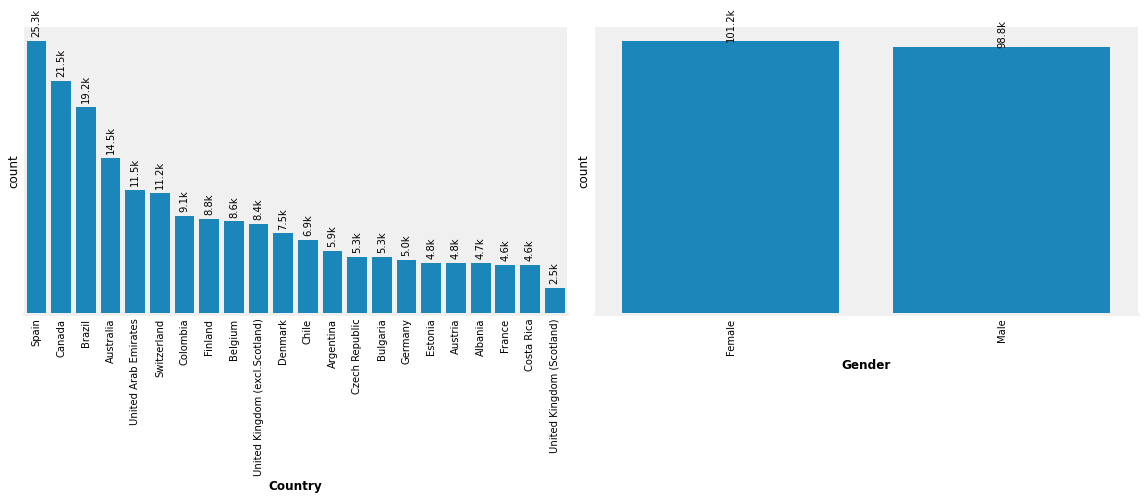

In [53]:
count_dplot(['country', 'gender'], annotr=90)

Most of the students that fill the survey comes from Spain, Canada and Brazil with highest Female gender. Did females perform well in education than male students? Which country have highest students performance in examination?

### Students Primary Education

Does students have a primary education when they were young? How many years did it took to finish their primary education? What was the age of majority of students then?

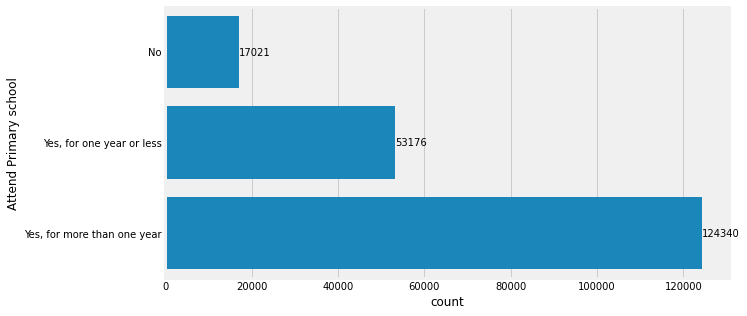

In [54]:
count_dplot('pri_sch', usex=False, figsize=(9, 5))
plt.ylabel('Attend Primary school');

Majority of students attended primary school for more than one year. Does primary educational knowledge of students increase or boost their score in international examination?

In [55]:
pisa_df['age_at_pri_sch'].describe()

count    184727.000000
mean          6.053138
std           1.186729
min           4.000000
25%           5.000000
50%           6.000000
75%           7.000000
max          16.000000
Name: age_at_pri_sch, dtype: float64

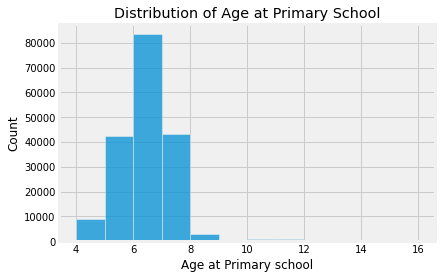

In [56]:
bin_size = np.arange(4, 17, 1)
g = sb.histplot(data=pisa_df, x='age_at_pri_sch', bins=bin_size)
g.set_xlabel('Age at Primary school')
g.set_title('Distribution of Age at Primary School');

The age of most student during their Primary Education falls between 4-8 age bracket with fewer students older than that. Does early education influence student performance in education?

### Possession

Investigate the basic possession of students. Did students possess room, computer, internet and textbook to prepare for their education?

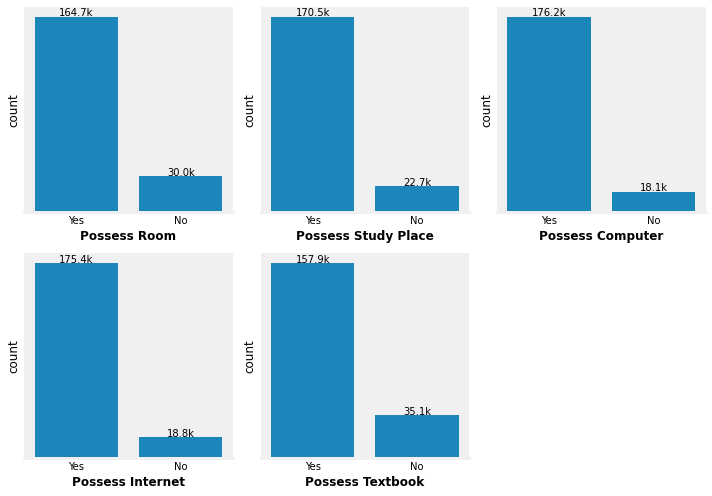

In [57]:
count_dplot(possession, ncols=3, nrows=2, figsize=(10, 7), tick_angle=0)

In this dataset, many students possess room and computer but some didn't e.g., 30,000 students didn't have a room, 18,800 students didn't have room to study while 18,100 students didn't have a computer to do research and learn more. How will these students perform in their examination?

High number of students possess both internet and textbook, but quite a few didn't. Will students without textbook to read or internet to learn pass their examinations?

### Parent Education Level & Earnings

Investigate the educational level of the parents. What are the most common levels of educational achievement of both parent?

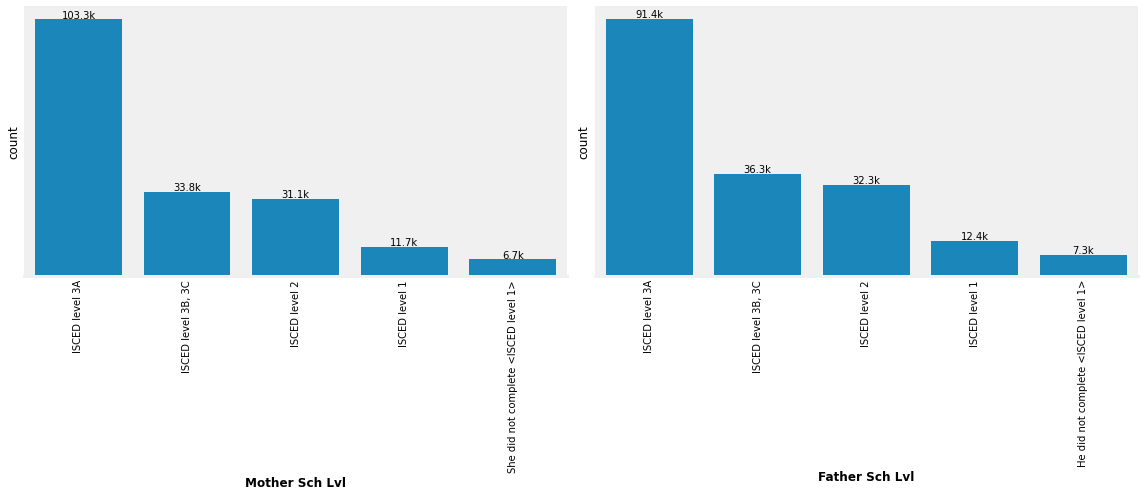

In [58]:
count_dplot(p_schlvl_cols, annotr=0)

There is right skewed distribution in both parent educational level, i.e., Approximately half of the students in the study have a parent with some college education. How well did students that have parent with degree perform compare to those with None? Does parent education have influence on the performance of students?

### Parent Job Status

Since approximately half of the students parent have high degree, are they employed full-time or part-time?

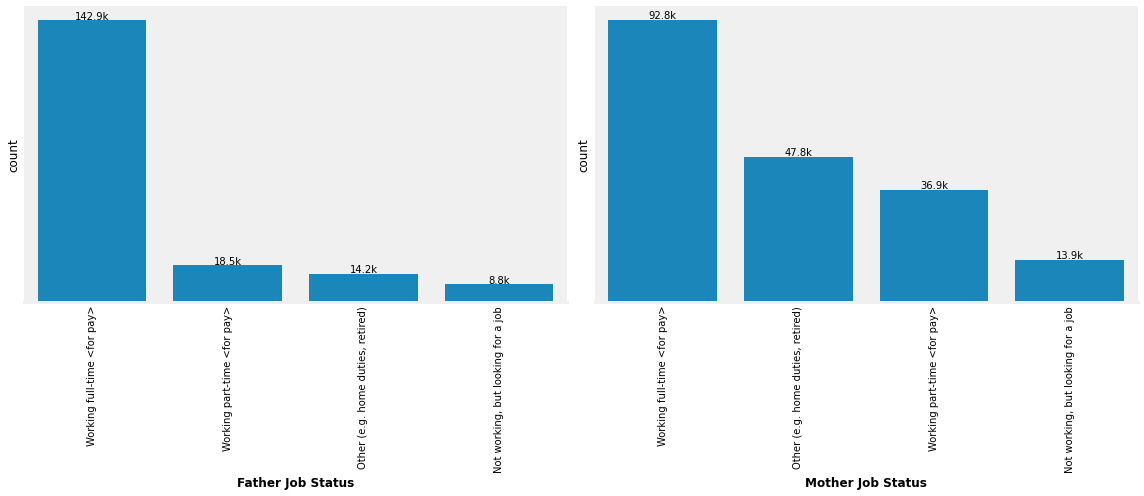

In [59]:
count_dplot(['father_job_status', 'mother_job_status'])

High number of student's parent are employed full-time with slight number of retiree and part-time workers. Does student with working full-time parent perform higher than those without?

### Distribution of Parent Earning (Pct)

In [60]:
pisa_df[['father_earning_pct', 'mother_earning_pct']].describe()

,father_earning_pct,mother_earning_pct
count,169195.000000,157717.000000
mean,43.876301,45.086883
std,21.884619,21.995521
min,11.010000,11.010000
25%,25.710000,25.040000
50%,36.350000,43.330000
75%,65.010000,65.420000
max,88.960000,88.960000


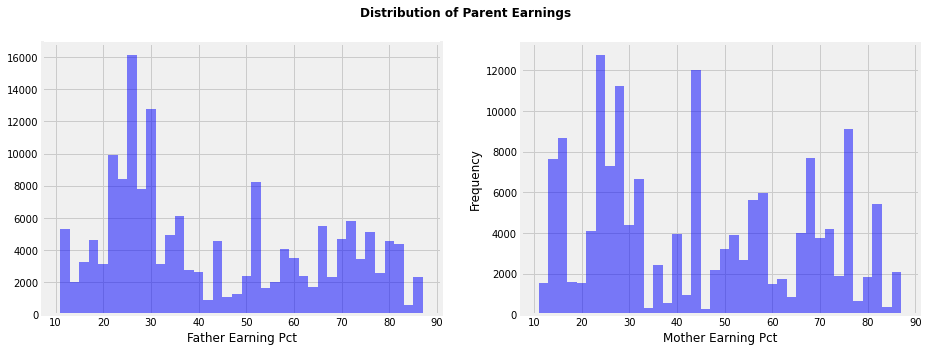

In [61]:
bins = np.arange(11, 89, 2)
plt.figure(figsize= (14, 5))
for k, col in enumerate(['father_earning_pct', 'mother_earning_pct'], 1):
    plt.subplot(1, 2, k)
    plt.hist(pisa_df[col], bins=bins, color='b', alpha=0.5)
    plt.xlabel(col.replace("_", " ").title())
plt.ylabel('Frequency')
plt.suptitle('Distribution of Parent Earnings', fontweight='bold');

Distribution of Parent earnings (Pct) is fairly spread out with approximate mean of 44, 45 respectively and standard deviation of 22 (with both minimum and maximum of 11 and 89 respectively). Does parent earning affect the performance of students in school?

### Math attributes

Are students interested in mathematics?

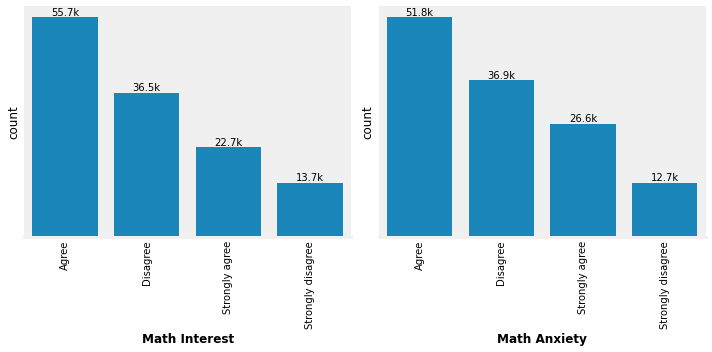

In [62]:
count_dplot(math_related[:2], figsize=(10, 5))

According to the survey data, many students agree to be interested in mathematics while some diagree so as the anxiety towards mathematics. Is it because of the teacher's behaviour or teacher's support? Or does primary education contribute to their interest or anxiety towards mathematics?

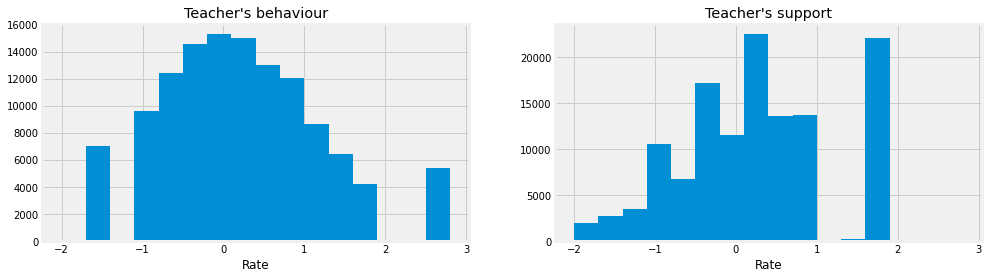

In [63]:
bins = np.arange(-2, 3, 0.3)
plt.figure(figsize=(15, 4))
plt.subplot(1, 2, 1)
plt.hist(pisa_df['teacher_behaviour'], bins=bins)
plt.title("Teacher's behaviour")
plt.xlabel('Rate')

plt.subplot(1,2,2)
plt.hist(pisa_df['teacher_support'], bins=bins)
plt.title("Teacher's support")
plt.xlabel('Rate');

The distribution of teacher's behaviour tends to be uni-modal distribution (i.e., between -1 and 2) while teacher's support rate is skewed to the left. There are noticable extreme values in this distribution that may worth further investigation (negative values and some values towards 3).

### Distribution of Students performance in different subjects

Examine the distribution of student scores in different subjects. Are there any obvious differences in the distribution? 

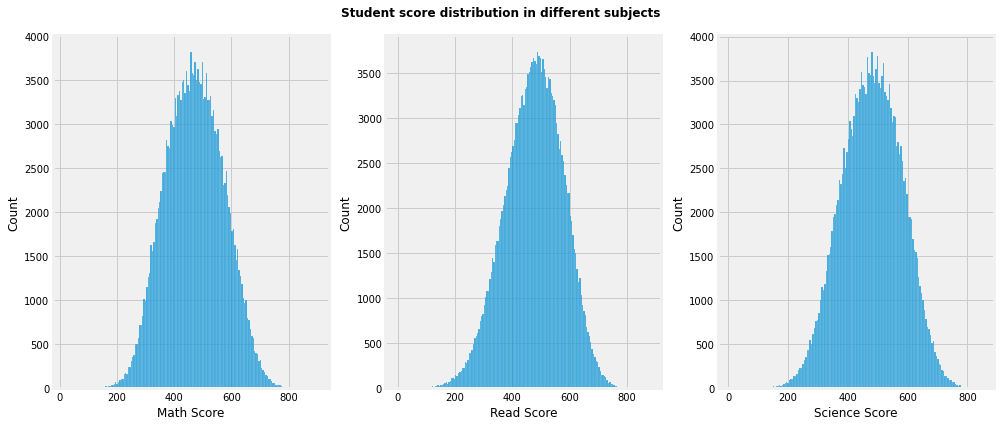

In [64]:
def score_distribution():
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14, 6))
    cols = ['math_score', 'read_score', 'science_score']
    for i, ax in enumerate(axes):
        g = sb.histplot(data=pisa_df, x=cols[i], ax=ax)
        g.set_xlabel(g.get_xlabel().replace("_", " ").title())
    plt.suptitle('Student score distribution in different subjects', fontweight='bold')
    plt.tight_layout();

score_distribution()

The distribution of students scores are normally distributed with mean between (470-480) and standard deviation (101-102). What contributes to the success of the students with highest score?

In [65]:
pisa_df.iloc[:, -3:].describe().round(2)

,math_score,read_score,science_score
count,200000.00,200000.00,200000.00
mean,471.08,474.88,480.63
std,101.45,102.00,101.77
min,19.79,0.08,6.84
25%,397.66,407.01,409.40
50%,470.25,479.13,481.85
75%,543.32,546.91,553.00
max,896.80,875.71,845.90


### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

- Students that filled the survey mostly come from Spain, Canada and Brazil etc., with highest number of Females.
- Approximately half of the student in this study have parent with more or college degree.
- There are quite number of students in the survey with no access to room to study, computer to do research so as internet and text! How will this student have distinction in their examination?
- Yes, transformation is done on some columns with observation having redundant character, leading and trailing spaces while na values were replaced with None in some columns for consistency. And some columns with inappropriate data type were converted into their right type and some columns which are categorical in nature were converted to category so as to make the data frame efficient and also reduce significant amount of memory.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

- Only the needed data were extracted from pisa dataset with thousands of rows with no tidiness issue but quality.
- Many variables were converted to ordinal categorical variable, this enables the plots to show the category in their logical order which improves the readability of the graph and also reduce the memory usage significantly.
- Parent earning (Pct) has a distribution with no clear shape or pattern.

## Bivariate Exploration

> In this section, all pairs of variables in the data will be investigated so as to identify the relationships between them.

### Countries with highest student score

Which country always have student mathematics score between 25th and 75th quantile?

In [66]:
pisa_df['math_score'].describe()

count    200000.000000
mean        471.075796
std         101.449512
min          19.792800
25%         397.655400
50%         470.252400
75%         543.316700
max         896.798600
Name: math_score, dtype: float64

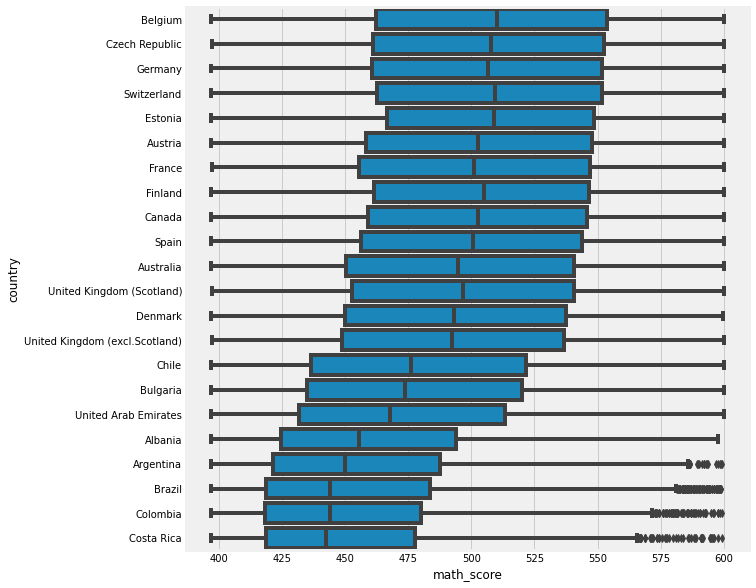

In [67]:
mathscore_above_25_percent = pisa_df.query("math_score >= 397 & math_score <= 600")
order = mathscore_above_25_percent.groupby('country')['math_score'].quantile(.75).sort_values(ascending=False).index
fig, ax = plt.subplots(figsize=(9, 10))
sb.boxplot(data=mathscore_above_25_percent, y='country', x='math_score', order=order,color=sb.color_palette()[0]);

Math score of Students at Belgium, Czelic Republic, Germany and Switzerland are always between the range of 460 and 550. What contribute to the performance of this student? Do they possess internet, room, computer and textbook?

In [68]:
def possess_score(subject:str= 'math_score', data: pd.DataFrame=mathscore_above_25_percent):
    fig, axis = plt.subplots(nrows=1, ncols=4, figsize=(13, 4))
    subj_cap = subject.replace("_", " ").title()
    for index, ax in enumerate(axis):
        g = sb.barplot(data=data, 
                            x=possession[index], y=subject,
                                ax=ax, color=sb.color_palette()[0])
        
        g.set(xlabel=g.get_xlabel().replace("_", " ").title(),
                ylabel=subj_cap)
        ax.bar_label(ax.containers[0], fmt="%.2f", label_type='edge', padding=2)
    plt.suptitle(f"{subj_cap} vs Student Possession")
    plt.tight_layout()

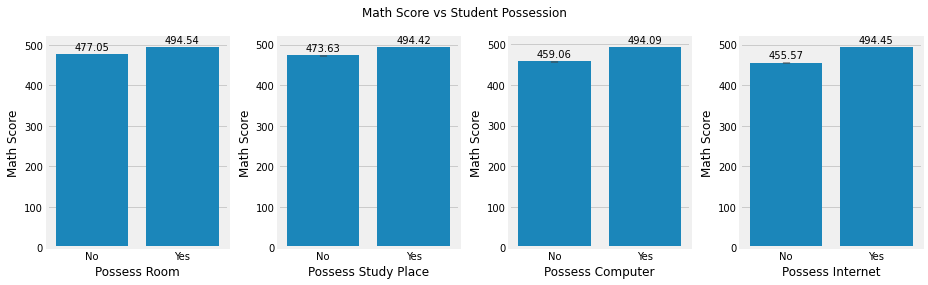

In [69]:
possess_score()

Most students that have higher score in mathematics possess a study room, computer, internet and textbook. It's possible that students without computer, internet and textbook do borrow from their friends that have because they also try.

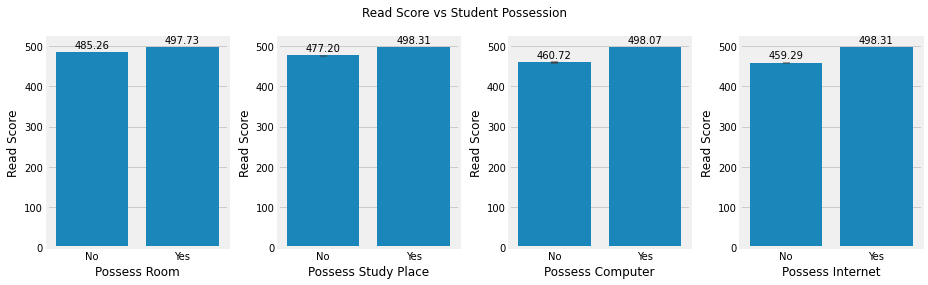

In [70]:
possess_score('read_score')

Still students with access to all these basic amenities perform excellently in read examination.

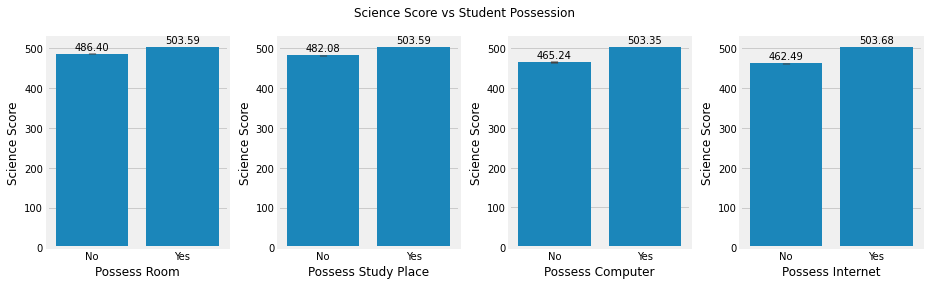

In [71]:
possess_score('science_score')

Student with all the basic amenities perform more than those without in science examination.

### Investigation on students at Belgium

Did most student with high performance in examination have access to all basic amenities such room, study place, computer and internet?

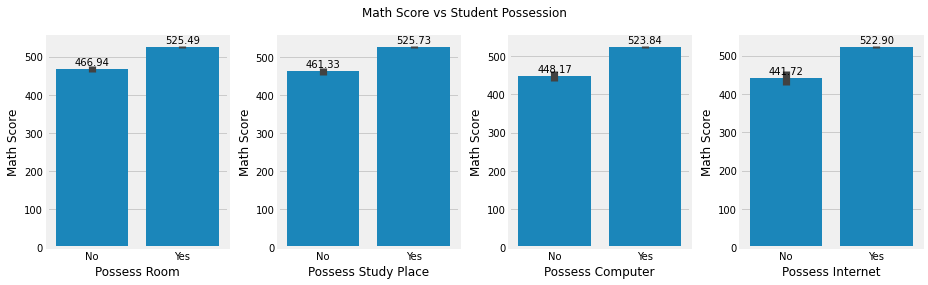

In [72]:
possess_score(data=pisa_df.query('country=="Belgium"'))

Not all students with high performance at Belgium possess computer, study place and internet but those with highest scores have access.

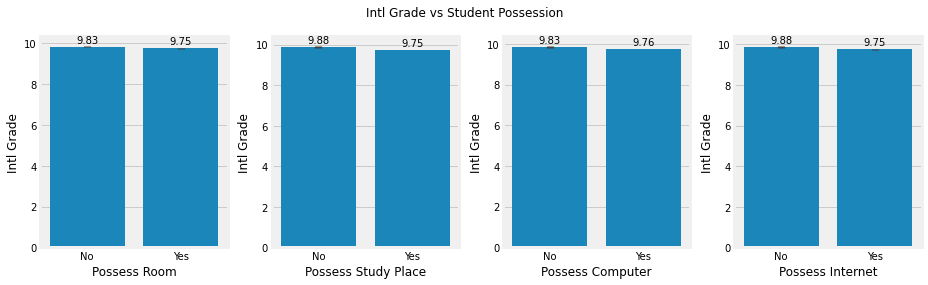

In [73]:
possess_score('intl_grade')

International Examination does not depend on whether students have access to any possession because because their general knowledge is being tested. 
It is safe to conclude that students that performs poorly in mathematics also have their area of strength. Are students with high performance male or female?

### Primary Education on Academic performance

What is the effect of primary education on academic performance?

In [74]:
def primary_edu_plot(x):
    sb.violinplot(data=pisa_df, y='pri_sch', x=x, inner='quartile', palette='Greens')
    plt.ylabel('Attend Primary Education');
    plt.xlabel(x.replace('_', " ").title())

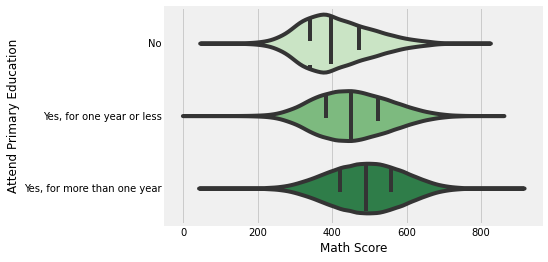

In [75]:
primary_edu_plot('math_score')

There is significant increase in score of students base on their experience in Primary Education. Primary education contributes excellently to the performance of students in mathematics.

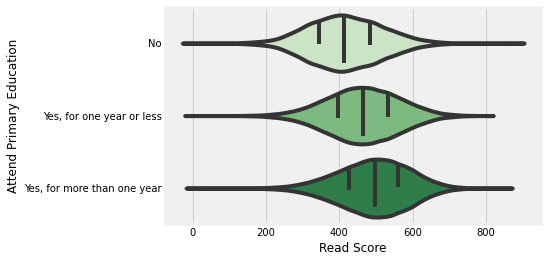

In [76]:
primary_edu_plot('read_score')

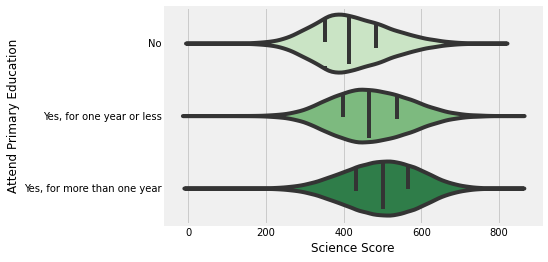

In [77]:
primary_edu_plot('science_score')

As can be seen from the above visuals, Primary education has a positive influence on student examination score with significant positive increase from those that don't attend to those that attend more a year.

### Early Education Influence

 Does early education influence student performance in education?

In [78]:
plt.style.use('seaborn')
def age_influence_plot(score, p='Blues_r'):
    fig, ax = plt.subplots(figsize=(15, 6))
    sb.boxenplot(data=pisa_df, x='age_at_pri_sch', y=score, palette=p, ax=ax)
    plt.xlabel('Age at Primary School')
    plt.ylabel(score.replace('_', " ").title())
    plt.title("Early education influence on Education")

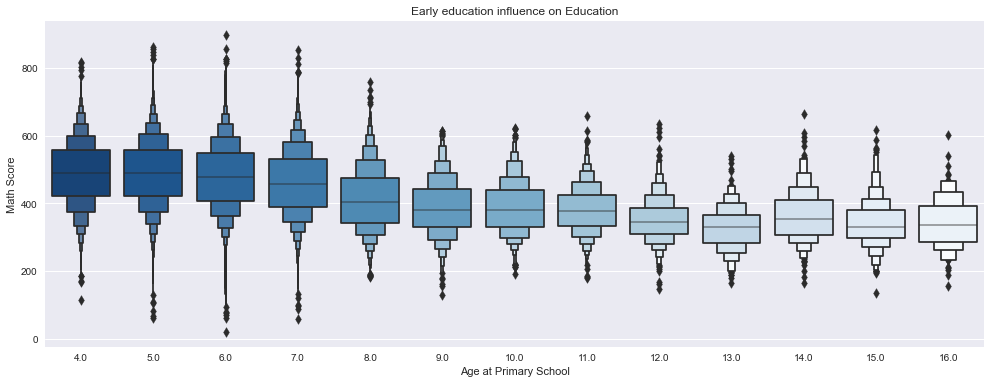

In [79]:
age_influence_plot('math_score')

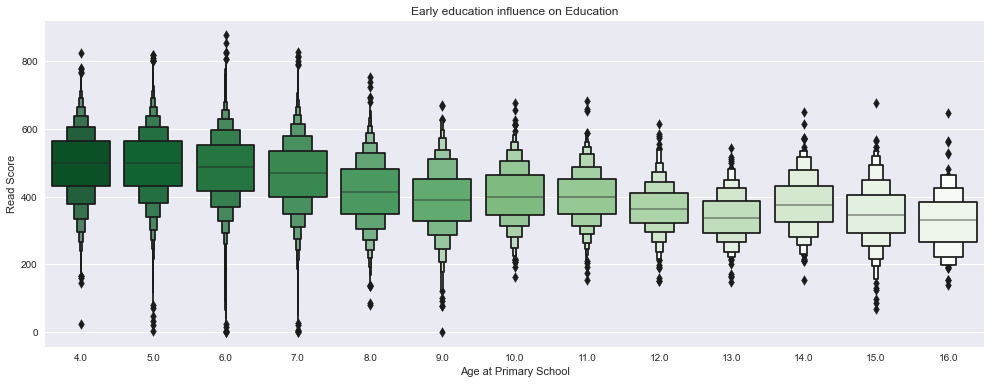

In [80]:
age_influence_plot('read_score', p='Greens_r')

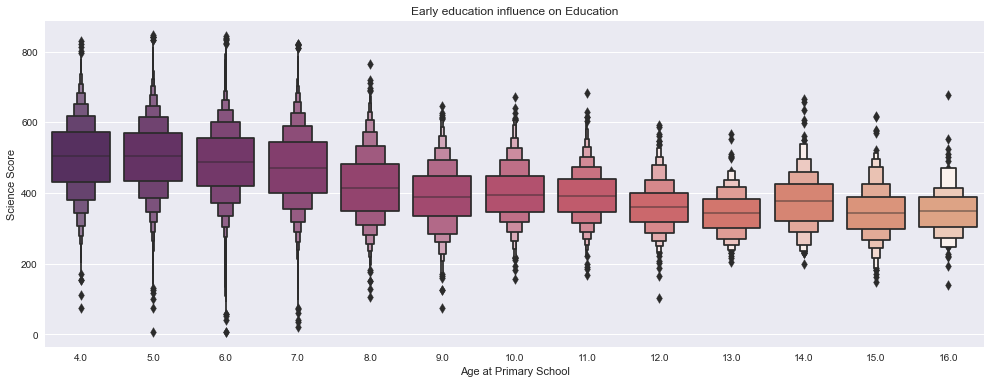

In [81]:
age_influence_plot('science_score', p='flare_r')

Age at which students start their primary education has a great influence on their academic performace. As can be seen from the visuals, students that start primary education at 4-7 age bracket perform well in their academics than those that are older before starting.

### Parent Education Influence on the Performance of the Students

How well did students that have parent with degree perform compare to those with None? Does parent education have influence on the performance of students?

In [82]:
def parent_degree_inf():
    """
        Parent degree influence on student performance
    """
    fig, axis = plt.subplots(nrows=2, figsize=(9, 12))
    g = sb.boxplot(data=pisa_df, y='mother_sch_lvl', x='math_score', palette='viridis_r', ax=axis[0])
    g.set(xlabel=g.get_xlabel().replace("_", " ").title(),
            ylabel=g.get_ylabel().replace("_", " ").title())

    g = sb.pointplot(data=pisa_df, y='father_sch_lvl', x='read_score', palette='viridis_r', ax=axis[1])
    g.set(xlabel=g.get_xlabel().replace("_", " ").title(),
            ylabel=g.get_ylabel().replace("_", " ").title())

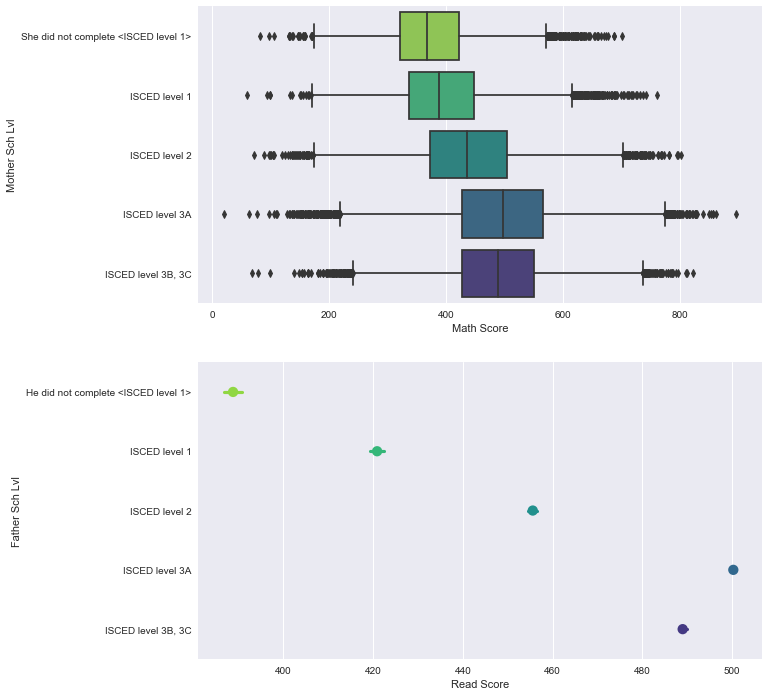

In [83]:
parent_degree_inf()

Students with parent having higher degree perform much better than those without.

### Parent Employment Status influence on Student Performance

In [84]:
def parent_emp_inf():
    """
        Parent employment influence on student performance
    """
    fig, axis = plt.subplots(nrows=2, figsize=(9, 12))
    g = sb.violinplot(data=pisa_df, y='father_job_status', x='math_score', palette='Blues', ax=axis[0])
    g.set(xlabel=g.get_xlabel().replace("_", " ").title(),
            ylabel=g.get_ylabel().replace("_", " ").title())

    g = sb.boxenplot(data=pisa_df, y='mother_job_status', x='read_score', palette='Greens', ax=axis[1])
    g.set(xlabel=g.get_xlabel().replace("_", " ").title(),
            ylabel=g.get_ylabel().replace("_", " ").title())

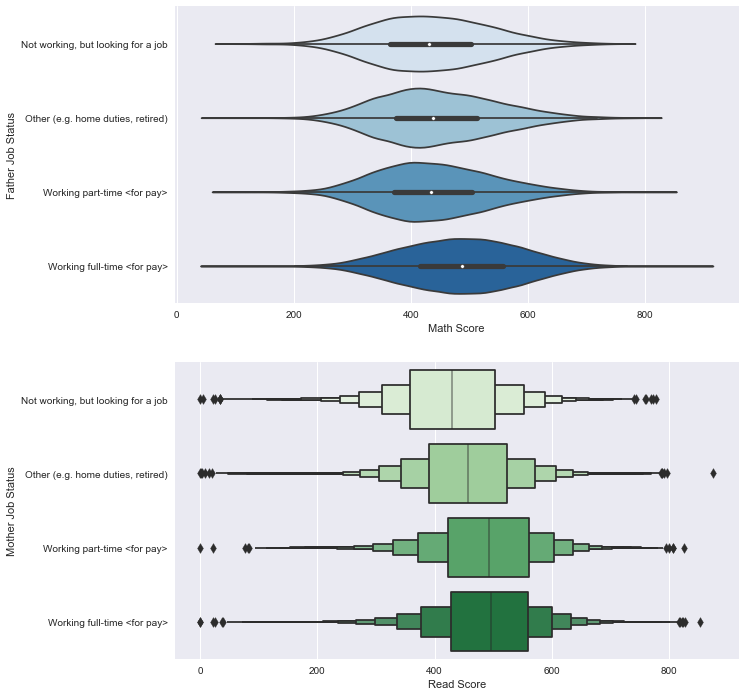

In [85]:
parent_emp_inf()

Student with parent looking for job tend to perform quite little as compare to those with full-time working parents. It is safe to say parent occupation is related to student performance.

### Parent Earning effect on Student Education Performance

How well did students with high income parent perform as compare to low income? Are there any low income parent with there children performing better in examination?

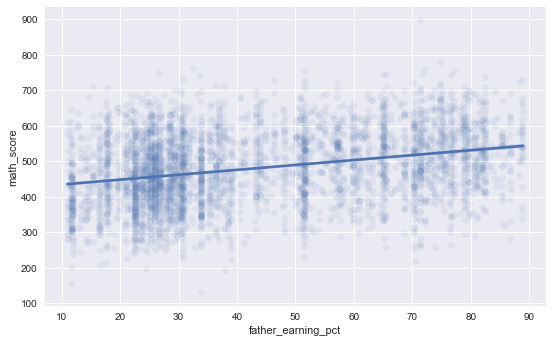

In [86]:
sb.regplot(data=pisa_df.sample(5000), x='father_earning_pct', y='math_score', scatter_kws={'alpha': 0.07});

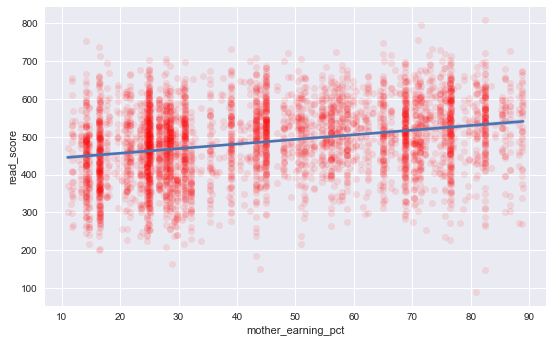

In [87]:
sb.regplot(data=pisa_df.sample(5000), x='mother_earning_pct', y='read_score', scatter_kws={'alpha': 0.1, 'color': 'r'});

There is a slight upward trend between parent earning and the performance of students in education. But this dedunction is not always the case because there are some students with low earning parent and are intelligent to perform better in examination. As can be seen from the visual, some students with low earning parent perform quite well!

### Relationship between teacher's behaviour and student examination score

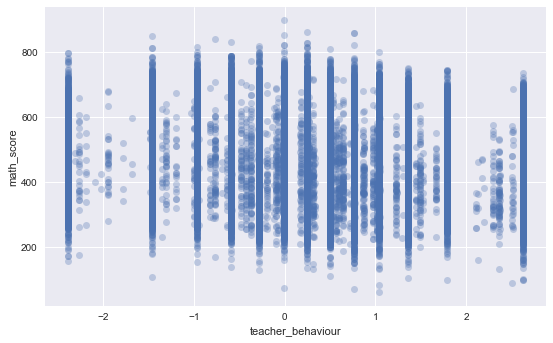

In [88]:
sb.regplot(data=pisa_df, x='teacher_behaviour', y='math_score', fit_reg=False, scatter_kws={'alpha': 0.3});

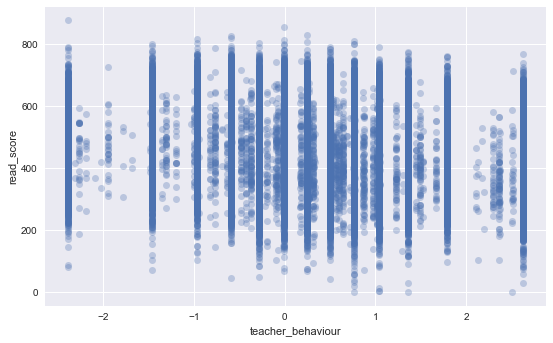

In [89]:
sb.regplot(data=pisa_df, x='teacher_behaviour', y='read_score', fit_reg=False, scatter_kws={'alpha': 0.3});

Interestingly, the examination score of student for all rated teacher are quite similar.

### Influence of students behaviour on the examination score

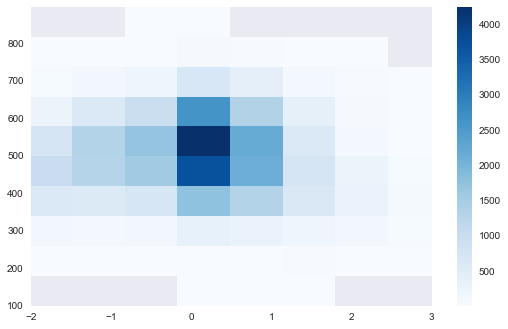

In [90]:
plt.hist2d(data=pisa_df.dropna(), x='math_behaviour', y='math_score', cmap='Blues', cmin=0.5)
plt.xlim([-2, 3])
plt.colorbar();

It is quite surprising, the behaviour of student with highest score in mathematics always falls between the range of 0 - 1.

### Gender role on Academic Performance

How does gender play roles in student examination score? Did male student perform better in reading? Are female student good in science?

In [91]:
def gender_effect_plot(exam_scores):
    plt.figure(figsize=(15, 7))
    for i, score in enumerate(exam_scores, 1):
        plt.subplot(1, 3, i)
        g = sb.violinplot(data=pisa_df, x='gender', y=score, inner='quartile', color='lightgreen')
        g.set(ylabel=score.replace("_", " ").title(), xlabel='Gender')
    plt.suptitle('Students performance in Examination base on their Gender')
    plt.tight_layout()

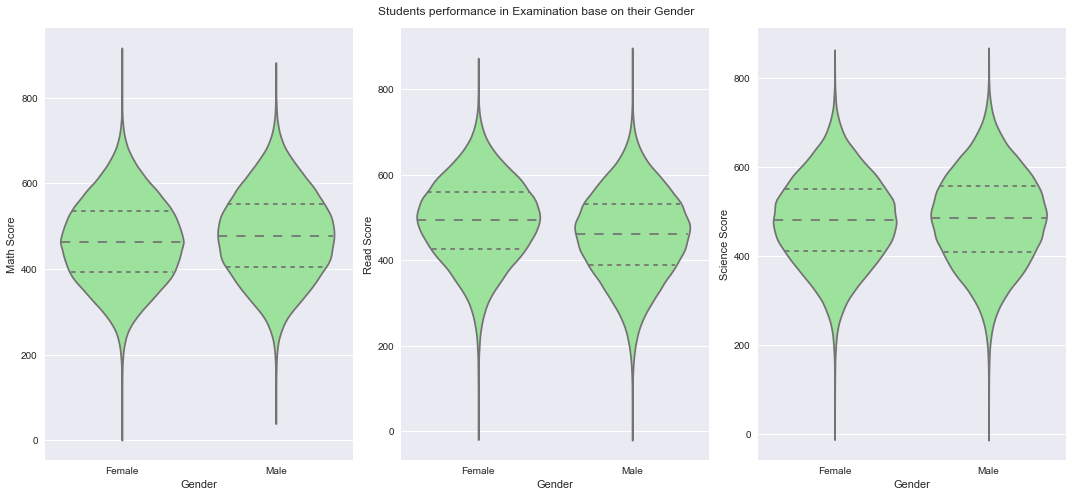

In [92]:
# Examination score
exam_scores = ['math_score', 'read_score', 'science_score']

gender_effect_plot(exam_scores)

Male students seem to have higher score in mathematics and science than females while females perform extremely high in reading than males.

### Subject Anxiety on Gender

Between males and females, who tend to have higher anxiety towards mathematics?

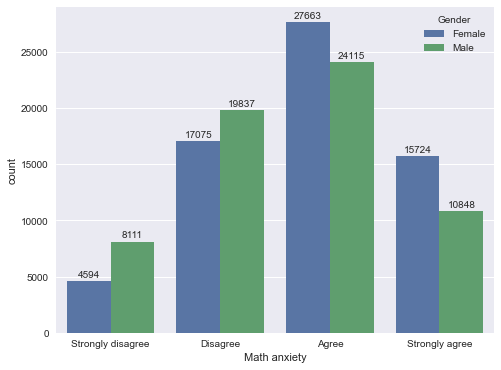

In [93]:
fig, ax = plt.subplots(figsize=(7, 6))
g=sb.countplot(data=pisa_df, x='math_anxiety', hue='gender')
g.set(xlabel='Math anxiety')
ax.bar_label(ax.containers[0], label_type='edge', padding=2) # Adding annotation
ax.bar_label(ax.containers[1], label_type='edge', padding=2) # Adding annotation
plt.legend(title='Gender');

As can be seen, high number of female students agree to have anxiety toward mathematics while lots of male student disagree. This attitude towards mathematics also contributes to their examination score in which male students perform significantly better than females.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

- Student with highest score always have access to study place, computer and internet i.e., There is relationship between student examination score and possession.
- Primary education contributes excellently to the performance of students in their academics i.e., Primary education is related to high academic performance.
- Age at which students start their primary education has a great influence on their academic performance i.e., Primary education age is related to student academic performance.
- Parent degree is related to student academic performance.
- Parent occupation status has a great influence on the performance of students in their academics i.e., Students with working full-time perform excellently in their academics.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

- Math anxiety is related to student math score.
- Most students in various country seems to always have high score in their examination because high number of students possess all basic amenities such as room to study, computer, internet and textbook.
- It is quite surprising, the behaviour of student with highest score in mathematics always falls between the range of 0 - 1.
- Student score on all rated teacher's behaviour are quite similar.

## Multivariate Exploration

In this section, an in-depth variable association will be done to see more interesting relationship.

### Gender, Score and Country

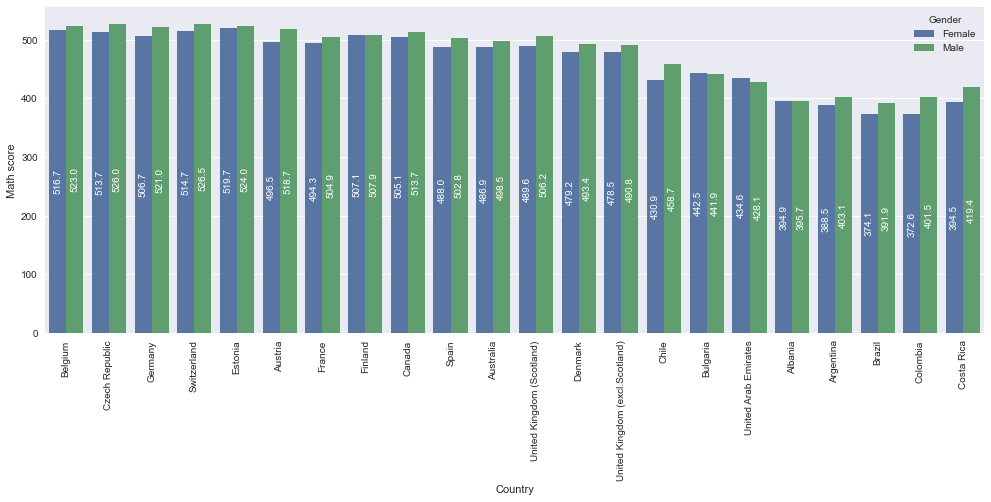

In [94]:
fig, ax = plt.subplots(figsize=(15, 6))
g = sb.barplot(data=pisa_df, y='math_score', x='country', errwidth=0, hue='gender', order=order)
ax.bar_label(ax.containers[0], rotation=90, fmt='%.1f', label_type='center', color='white')
ax.bar_label(ax.containers[1], rotation=90, fmt='%.1f', label_type='center', color='white')
g.set(xlabel="Country", ylabel="Math score")
plt.xticks(rotation=90)
plt.legend(title='Gender');

In most countries, Male students perform higher than females in mathematics.

### Primary Education and Possession of study place effect on Student Performance

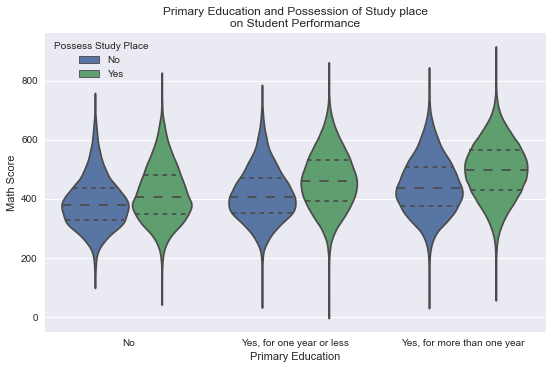

In [95]:
g = sb.violinplot(data=pisa_df, x='pri_sch', y='math_score', hue='possess_study_place', inner='quartile')
g.set(xlabel="Primary Education", ylabel="Math Score", title="Primary Education and Possession of Study place\non Student Performance")
plt.legend(loc=2, title="Possess Study Place");

Effect of primary education on math score varies base on whether students possess study place. Most students with best performance in mathematics have a place of study.

### Student age in Primary Education effect on their reading performance

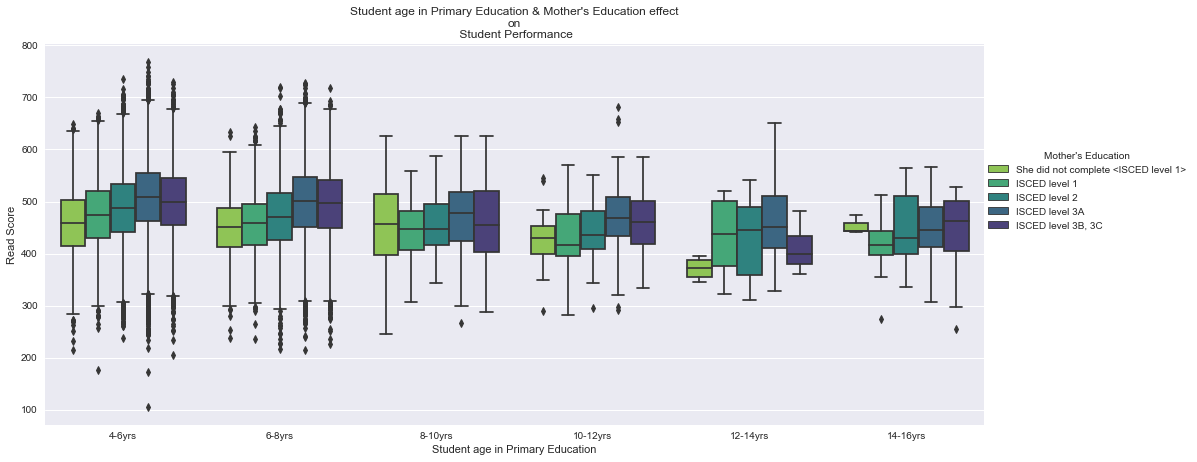

In [96]:
mathscore_above_25_percent['age_label'] = pd.cut(mathscore_above_25_percent['age_at_pri_sch'], 
                                                bins=[4, 6, 8, 10, 12, 14, 16], 
                                                labels=["4-6yrs", "6-8yrs", '8-10yrs', "10-12yrs", '12-14yrs', '14-16yrs'])
                                                
fig, ax = plt.subplots(figsize=(15, 7))
g = sb.boxplot(data=mathscore_above_25_percent, x='age_label', y='read_score', hue='mother_sch_lvl',
                     palette='viridis_r', ax=ax)
g.set(xlabel='Student age in Primary Education', 
            ylabel="Read Score", title="Student age in Primary Education & Mother's Education effect\non\n Student Performance")
plt.legend(loc=(1, 0.5), title="Mother's Education");

There tends to be consistency in performance score of students that are between the age range of 4-8yrs when in primary education, where students with parent having college degree or more perform high in the read exam.

### Student Interest effect on their Performance in Examination

How does the interest of students affect their examination score? Is it gender specific?

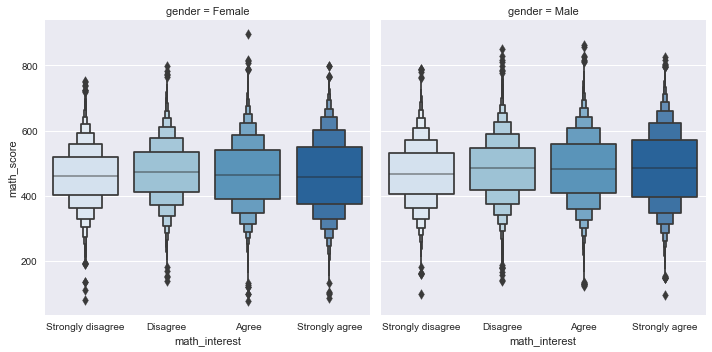

In [97]:
g = sb.FacetGrid(data=pisa_df, col='gender', aspect=1, height=5)
g.map(sb.boxenplot, 'math_interest', 'math_score', palette='Blues');

It is clear that the stronger the interest of students in mathematics, the higher their exam score. And this logic applies to both males and females i.e., not gender specific.

### Relationships between all numerical features

Is there a relationship between students' examination score in different subjects? Does teacher's support have any relationship with the student examination score?

<AxesSubplot:>

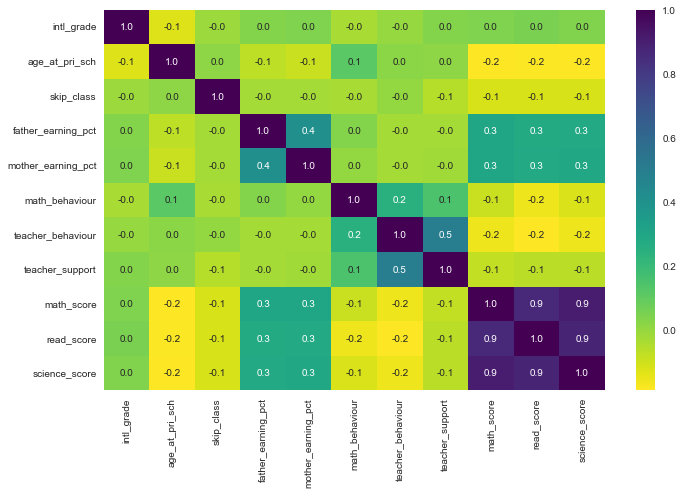

In [98]:
fig, ax = plt.subplots(figsize=(10, 7))
sb.heatmap(pisa_df.corr(), cmap='viridis_r', annot=True, fmt='.1f', ax=ax)

It can be clearly seen that there is 90% correlation between student examination score in various subject. Teacher support has no relationship with the student examination score. And also, parent earning contribute a lots to the score of students in there examination.

### Parent Earning Effect on Students score

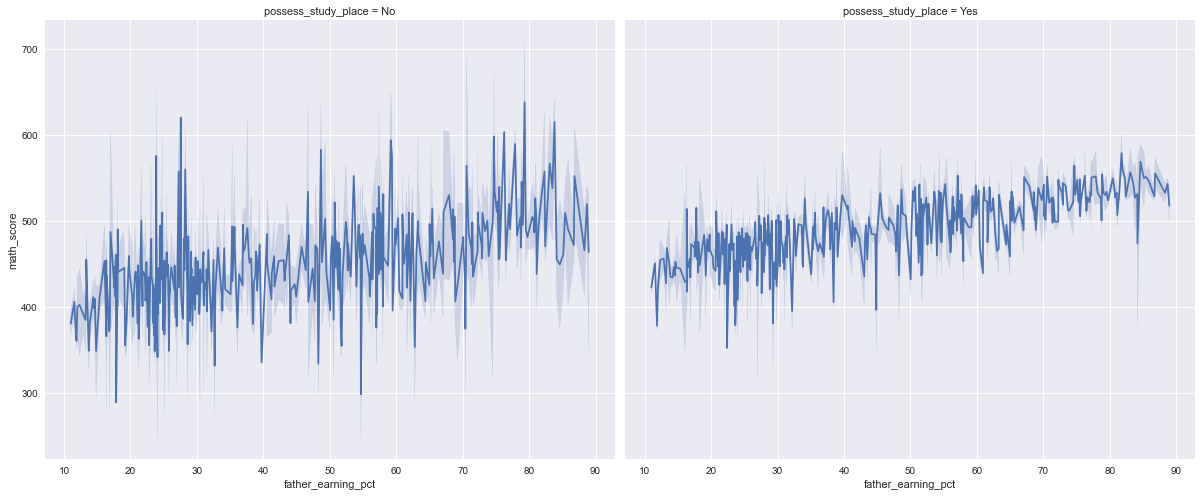

In [100]:
g = sb.FacetGrid(data=pisa_df, col='possess_study_place', aspect=1.2, height=7)
g.map(sb.lineplot, 'father_earning_pct', 'math_score');

There is an Upward tread between parent earning and the performance of students in Examination. The level of consistency in the upward trend in the score of student that possess a study place is more smooth as compare those that have no study place i.e., There is a consistent increase in the score of students base on the earning of their parents.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
- In most countries, male students perform high in mathematics.
- There is relationship between the year students spent in primary education and their performance in higher education.
- Students with highly educated parents that enroll in primary education early performs well in their higher education as compare to others.
- There is relationship between the interest of student in a study and the examination score of that particular study.
- The parent earning has a slight relationship with the student examination score.

### Were there any interesting or surprising interactions between features?

- All students examination scores have a correlation 90%.
- Both parents earning are correlated with 30% confidence interval.
- It would have been expected that teacher support would be correlated with student examination score, but they are not correlated!

## Conclusions
>You can write a summary of the main findings and reflect on the steps taken during the data exploration.



> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

